x.shape= (500, 2), y.shape= (500,)
Label: 0	 Counts: qt_label= np.int64(250)
Label: 1	 Counts: qt_label= np.int64(250)


array([[0.79067956, 0.20932044],
       [0.36522839, 0.63477161],
       [0.69843739, 0.30156261],
       [0.73236172, 0.26763828],
       [0.36668444, 0.63331556],
       [0.70594969, 0.29405031],
       [0.71923673, 0.28076327],
       [0.35150319, 0.64849681],
       [0.77512207, 0.22487793],
       [0.62717489, 0.37282511],
       [0.69274635, 0.30725365],
       [0.78730706, 0.21269294],
       [0.77218745, 0.22781255],
       [0.39531806, 0.60468194],
       [0.26371941, 0.73628059],
       [0.23999699, 0.76000301],
       [0.71482159, 0.28517841],
       [0.48795991, 0.51204009],
       [0.78198654, 0.21801346],
       [0.74844583, 0.25155417],
       [0.34456697, 0.65543303],
       [0.3921869 , 0.6078131 ],
       [0.32780293, 0.67219707],
       [0.5047852 , 0.4952148 ],
       [0.7337389 , 0.2662611 ],
       [0.69543886, 0.30456114],
       [0.75823169, 0.24176831],
       [0.26263084, 0.73736916],
       [0.36704294, 0.63295706],
       [0.36319202, 0.63680798],
       [0.

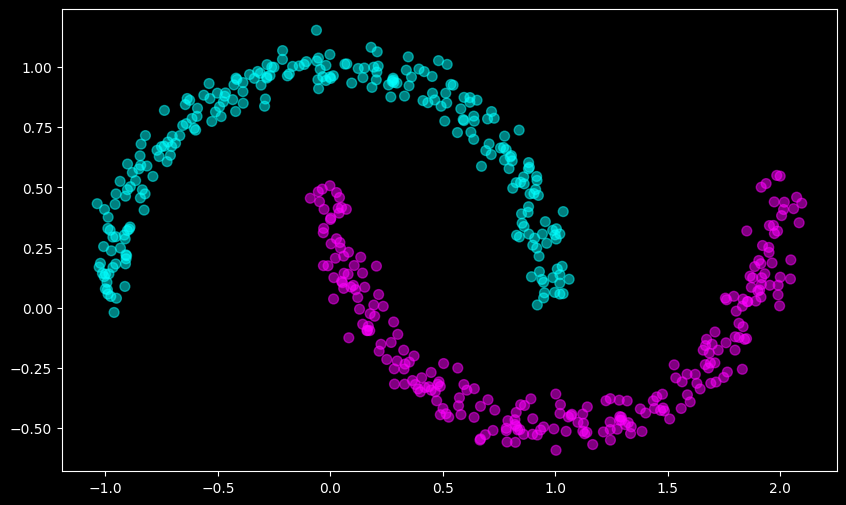

In [2]:
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.datasets as datasets

plt.rcParams['figure.figsize'] = [10, 6]
plt.style.use('dark_background')

x,y = datasets.make_moons(n_samples=500,noise=0.05)
x.shape,y.shape

print(f'{x.shape= }, {y.shape= }')

pd.DataFrame({'x_1':x[:,0],'x_2':x[:,1],'y':y})

unique = np.unique(y, return_counts=True)
for label,qt_label in zip(unique[0],unique[1]):
    print(f'Label: {label}\t Counts: {qt_label= }') 

plt.scatter(x[:,0],x[:,1],c=y,s=50,alpha=0.5,cmap='cool')

class NnModel:
    def __init__(self,x:np.ndarray,y:np.ndarray,hidden_neurons:int=10,output_neurons:int=2):
        np.random.seed(8)
        self.x = x
        self.y = y
        self.hidden_neurons = hidden_neurons
        self.output_neurons = output_neurons
        self.input_neurons = self.x.shape[1]
        
        #inicializando pesos e bias
        #Xavier Initialization -> variancia dos pesos iguais em todas as camadas
        self.W1 = np.random.randn(self.input_neurons,self.hidden_neurons) / np.sqrt(self.input_neurons)
        self.B1 = np.zeros((1,self.hidden_neurons))
        self.W2 = np.random.randn(self.hidden_neurons,self.output_neurons) / np.sqrt(self.hidden_neurons)
        self.B2 = np.zeros((1,self.output_neurons))
        self.model_dict = {'W1': self.W1,'B1': self.B1,'W2': self.W2,'B2': self.B2}
        self.z1 = 0
        self.f1 = 0  
    def foward(self,x:np.ndarray) -> np.ndarray:
        #eq da reta
        self.z1 = x.dot(self.W1) + self.B1
        #função de ativação
        self.f1 = np.tanh(self.z1)
        #eq da reta 2
        z2 = self.f1.dot(self.W2) + self.B2
        #função de ativação 2
        f2 = np.tanh(z2)
        #Softmax
        exp_values = np.exp(f2)
        softmax = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        return softmax
    def loss(self):
        pass
    def backpropagation(self):
        pass
    def fitr(self):
        pass    
    
    
modelo = NnModel(x,y,hidden_neurons=3,output_neurons=2)
modelo.foward(x)